Q1

Text(0.5, 1.0, 'Transformed')

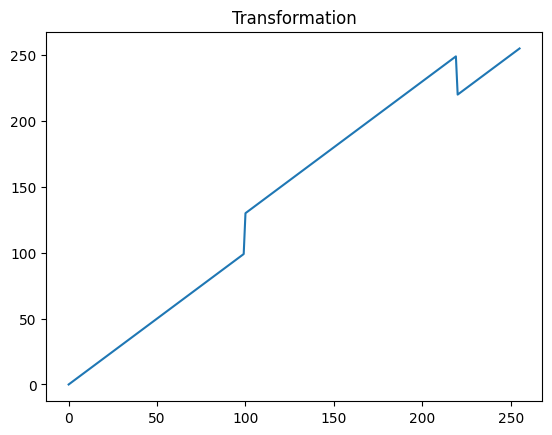

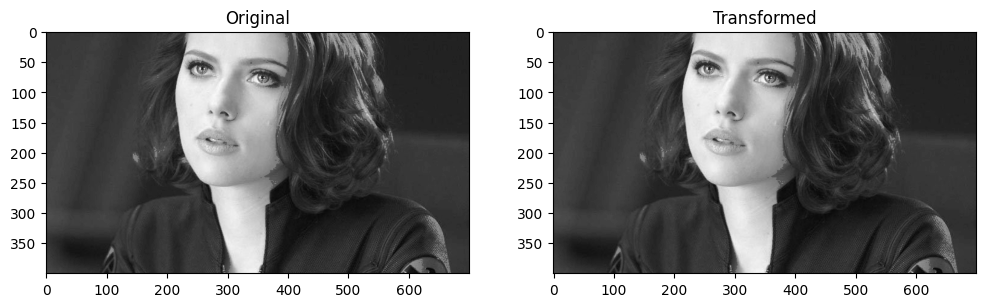

In [36]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r"D:\Saves\Python\ImgProAssingment1\images\natasha_grayscale.jpg", cv.IMREAD_GRAYSCALE)
assert im is not None

shift=30

t = np.arange(0,256).astype(np.uint8)
for i in range(100,220):
    t[i]=t[i]+shift
    
#plt.plot(t)
#print(t.shape)

g = t[im]

plt.plot(t)
plt.title("Transformation")

fig, ax= plt.subplots(1,2, figsize=(12,24))

ax[0].imshow(g, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(g, cmap='gray')
ax[1].set_title('Transformed')




Q2

(438, 780)


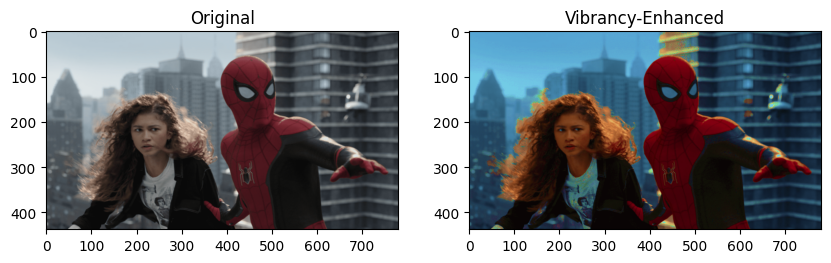

Text(0.5, 1.0, 'Intensity Transformation')

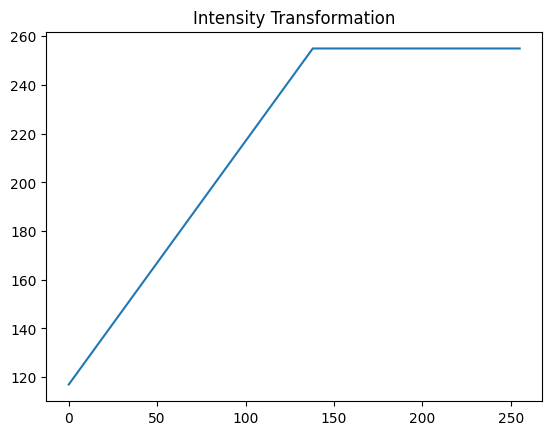

In [33]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

imbrg = cv.imread(r"D:\Saves\Python\ImgProAssingment1\images\spider.png", cv.IMREAD_ANYCOLOR)
imrgb= cv.cvtColor(imbrg, cv.COLOR_BGR2RGB)


#Q2(a)
imhsv = cv.cvtColor(imbrg, cv.COLOR_BGR2HSV)
h,s,v = cv.split(imhsv)
h,z,v = cv.split(imhsv)

#Q2(b,c)
a=15000
def trnsf(x):
    return( min( ((x)+(a*(np.exp(-(x-128)**2/(2*a**2))))/128), 255) )

t = np.arange(0,256).astype(np.uint8)
for p in range(0,256):
    t[p]=trnsf(t[p])

for i in range(s.shape[0]):
    for j in range(s.shape[1]):
        s[i,j]=trnsf(s[i,j])
        
#Q2(d)
imhsv2=cv.merge([h, s, v])
imrgb2= cv.cvtColor(imhsv2, cv.COLOR_HSV2RGB)

#Q2(e)
print(s.shape)
fig, ax= plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(imrgb)
ax[0].set_title('Original')
ax[1].imshow(imrgb2)
ax[1].set_title('Vibrancy-Enhanced')
plt.show()

plt.plot(t)
plt.title("Intensity Transformation")

Q3

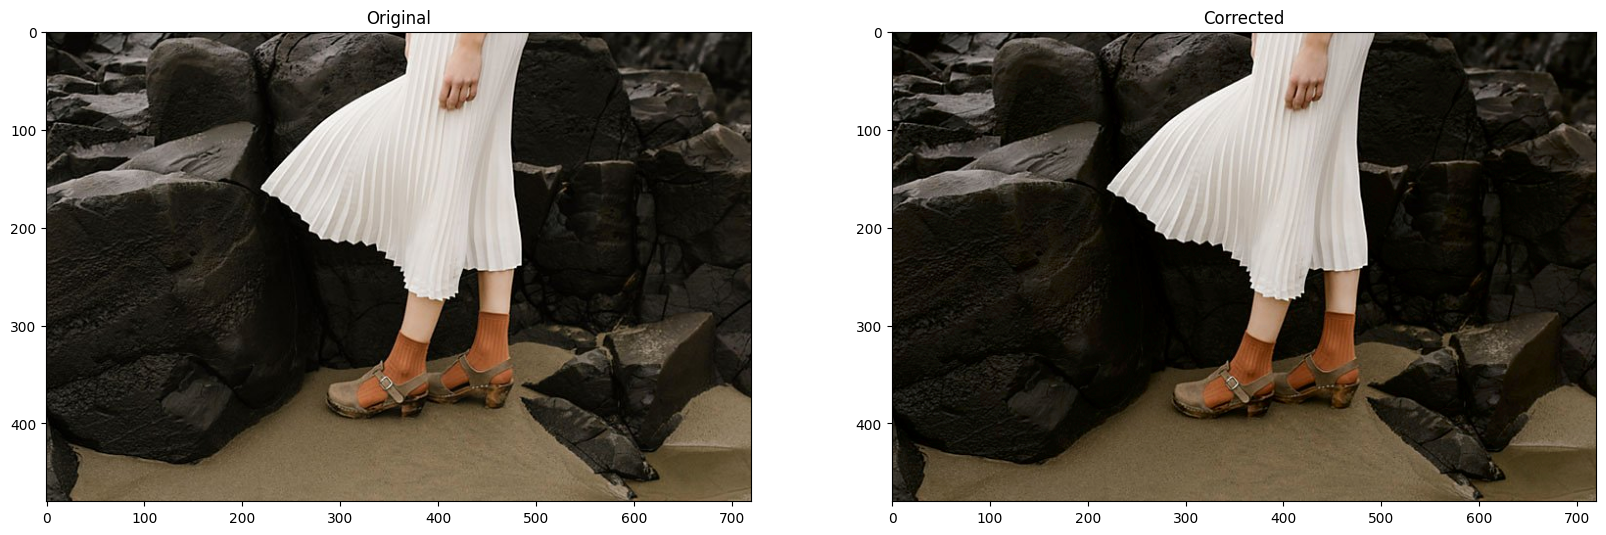

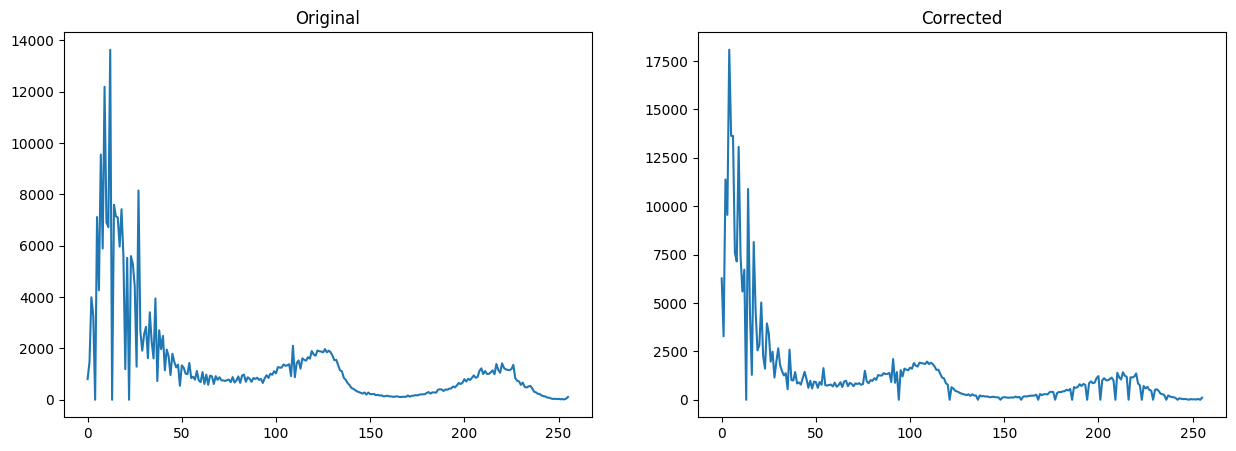

In [37]:
 


import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

imbgr = cv.imread(r"D:\Saves\Python\ImgProAssingment1\images\highlights_and_shadows.jpg", cv.IMREAD_ANYCOLOR)
imrgb= cv.cvtColor(imbgr, cv.COLOR_BGR2RGB)

imlab = cv.cvtColor(imbgr, cv.COLOR_BGR2LAB)
l,a,b = cv.split(imlab)
l2,a,b = cv.split(imlab)

gamma=1.2                                                                #value of gamma
t= np.array([(i/255.)**gamma*255 for i in range(256)], dtype=np.uint8)

l = cv.LUT(l,t)

imlab2=cv.merge([l, a, b]) 
imrgb2= cv.cvtColor(imlab2, cv.COLOR_LAB2RGB)                            #Gamma Correction Applied

hist1= cv.calcHist([l],[0], None, [256], [0,256])
hist2= cv.calcHist([l2],[0], None, [256], [0,256])

fig, ax= plt.subplots(1,2, figsize=(20,40))
ax[0].imshow(imrgb)
ax[0].set_title('Original')
ax[1].imshow(imrgb2)
ax[1].set_title('Corrected')

fig, ax= plt.subplots(1,2, figsize=(15,5))
ax[0].plot(hist2)
ax[0].set_title('Original')
ax[1].plot(hist1)
ax[1].set_title('Corrected')
plt.show()




